**Задание**

Взять данные по [ссылке](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) и:

- Провести разведочный анализ данных
    - какие зависимости в данных?
    - [сбалансированы](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset) ли классы?
    - основные статистики признаков
- Разделить данные на train/test
    - разделить на обучающую и тестовую подвыборки
    - сравнить статистики подвыборок и генеральной выборки
- Обучить модели классификации
    - какие метрики точности?
    - какая модель лучше всего справилась?

**Разведочный анализ данных**

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/credit/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Посмотрим на пропуски в данных:

In [ ]:
nan = df.isna().sum().sum()
print(f'Количество пропусков в данных: {nan}')

Количество пропусков в данных: 0


Посмотрим на дубликаты в данных и удалим их:



In [ ]:
len_df = len(df)
df.drop_duplicates(inplace = True)
duplicates = len_df - len(df)
print(f"Количество дубликатов в данных: {duplicates}")

Количество дубликатов в данных: 1081


Посмотрим на матрицу корреляции:

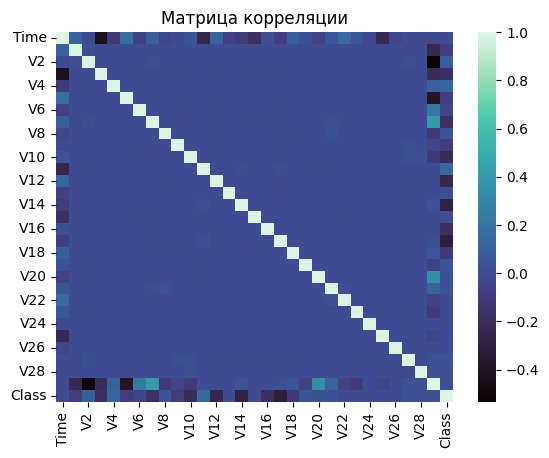

In [ ]:
sns.heatmap(df.corr(), cbar = True, cmap = "mako")
plt.title("Матрица корреляции")
plt.show()

1. Параметры V1-V28 линейно зависят от параметров Time и Amount.
2. Все параметры коррелируют с параметром Class, кроме Time и Amount.

Посмотрим на процент мошеннических операций в данных (классы несбалансированы):

In [ ]:
percent = round(df.Class.value_counts()[1] / df.shape[0] * 100, 3)
print(f'Процент мошеннических операций в данных: {percent}%')

Процент мошеннических операций в данных: 0.167%


Посмотрим на основные статистики признаков:

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Посмотрим на `paiplot`:

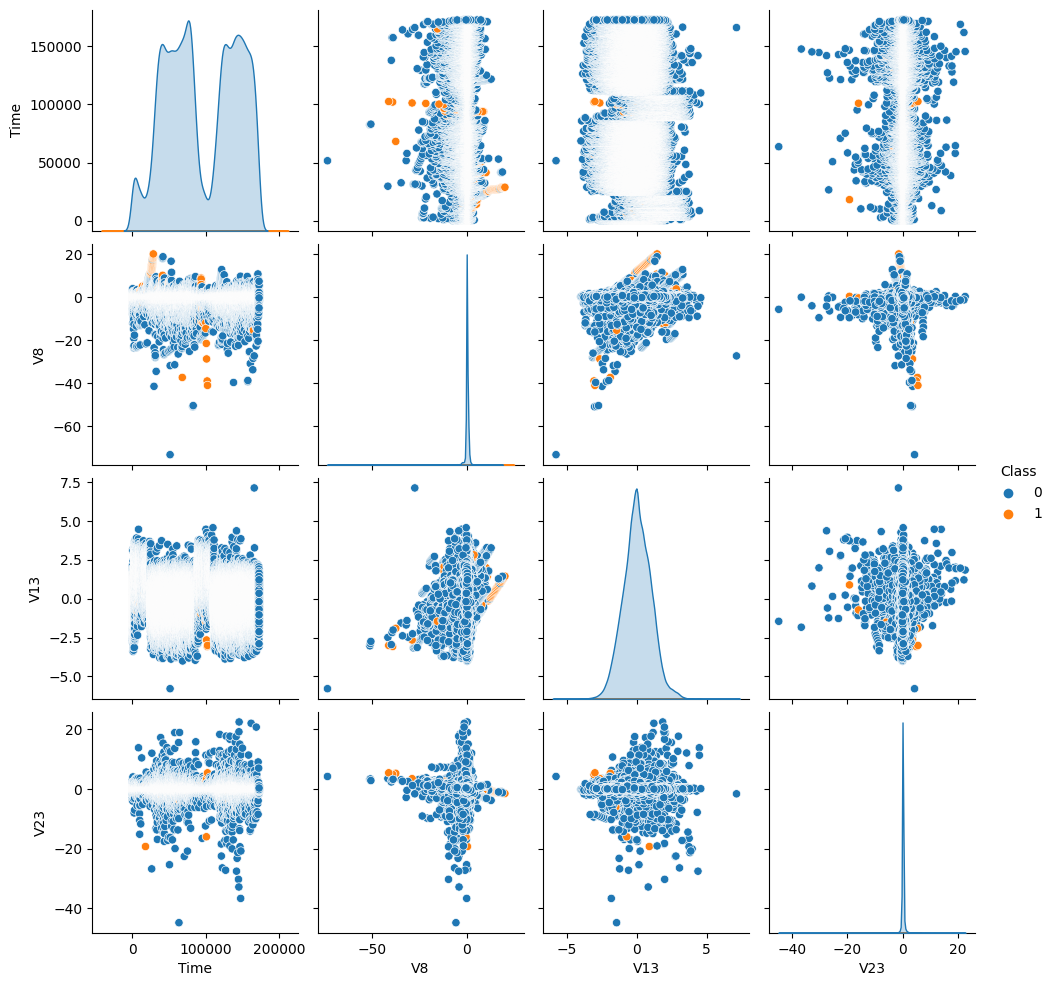

In [ ]:
parametrs = ['Time', 'V8', 'V13', 'V23']
data = df[parametrs + ['Class']]
sns.pairplot(data, hue = 'Class', diag_kind = 'auto')
plt.show()

1. Данные - нелинейные зависимости.
2. Визуально - разделить можно.

**Данные на train/test**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

x = df.drop(['Class'], axis = 1)
y = df.Class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
percent_train = round(y_train.value_counts()[1] / y_train.shape[0] * 100, 3)
percent_test = round(y_test.value_counts()[1] / y_test.shape[0] * 100, 3)
print(f'В тренировочных данных процент мошеннических операций: {percent_train}%')
print(f'В тестовых данных процент мошеннических операций: {percent_test}%')

В тренировочных данных процент мошеннических операций: 0.167%
В тестовых данных процент мошеннических операций: 0.167%


**2. Сравнить статистики сэмплированных и не сэмплированных данных.**

In [ ]:
x_train.describe() - x_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,...,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000,113490.000000
mean,349.321162,-0.002689,-0.000255,0.002039,0.010443,0.010629,0.002622,-0.000741,0.002758,-0.006590,...,0.001912,0.003912,-0.000073,-0.001938,0.001932,-0.001253,0.000507,-0.000846,0.003402,-0.503359
std,15.555743,-0.002333,-0.001586,-0.008102,0.017189,-0.064794,-0.023878,-0.094303,-0.016544,-0.002261,...,-0.049513,0.009040,0.000473,-0.012400,-0.002718,-0.001623,-0.003465,-0.015500,0.005570,-25.075175
min,-1.000000,-18.849443,-9.371029,14.644605,-0.123054,81.651178,-4.231194,-10.317913,-22.528299,-2.591540,...,30.850830,-11.941035,1.433721,11.978740,0.011778,1.598770,-0.070221,-12.670435,3.719188,0.000000
25%,238.500000,0.000747,0.003226,0.007934,0.002752,0.004931,0.003387,0.000541,0.000074,-0.001479,...,0.000850,-0.000129,0.002692,-0.000655,0.001579,-0.002673,0.001735,0.000533,0.001122,0.210000
50%,352.000000,-0.011077,0.002021,-0.007644,0.001674,0.005545,-0.002510,0.001078,0.001109,-0.001981,...,0.000647,0.001309,-0.000184,-0.001124,0.000439,-0.001868,0.001958,-0.000102,0.000847,0.180000
75%,272.750000,-0.003153,0.006808,-0.000498,0.013695,0.005580,0.004482,0.006003,0.000725,-0.005851,...,0.000617,0.000876,0.001640,0.000833,0.001836,-0.000798,-0.002883,0.001037,0.001940,0.700000
max,6.000000,0.015723,4.639080,5.280842,0.159807,1.890204,-51.908557,-86.286317,-0.419436,5.202106,...,-1.303695,7.139053,2.230857,0.444867,-0.568207,1.448738,0.054100,-19.459797,17.981087,-6781.160000


Нормализуем данные:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

**Используем логистическую регрессию:**

In [ ]:
from sklearn.metrics import classification_report

model = LogisticRegression(class_weight = 'balanced')
model.fit(x_train_normalized, y_train)

y_pred = model.predict(x_test_normalized)

report = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.99     85118



* Метрика ```recall``` достаточно высокая, что не скажешь о метрике ```precision```.



**1. Вывести confusion matrix для всех моделей**

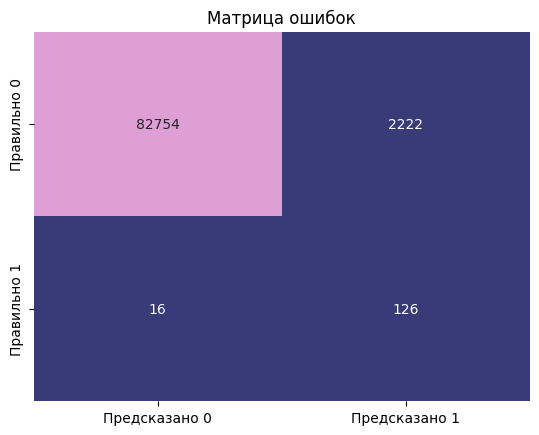

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt = "d", cbar = False, cmap = 'tab20b',
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Правильно 0', 'Правильно 1'])


plt.title('Матрица ошибок')
plt.show()

**Используем случайный лес:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x = df.drop(['Class'], axis = 1)
y = df.Class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

In [ ]:
model = RandomForestClassifier(random_state = 42, n_jobs = -1)
model.fit(x_train_normalized, y_train)

y_pred = model.predict(x_test_normalized)

random_forest = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.86       142

    accuracy                           1.00     85118
   macro avg       0.98      0.89      0.93     85118
weighted avg       1.00      1.00      1.00     85118



* Метрика ```precision``` гораздо выше, однако метрика ```recall``` чуть хуже.



**1. Вывести confusion matrix для всех моделей**

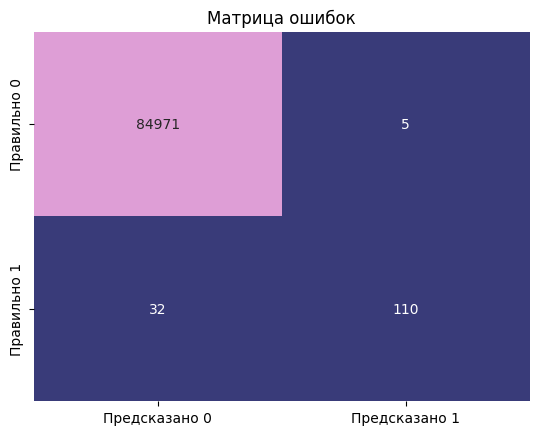

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot = True, fmt = "d", cbar = False, cmap = 'tab20b',
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Правильно 0', 'Правильно 1'])


plt.title('Матрица ошибок')
plt.show()

**3. Свести в единую таблицу результаты всех моделей**

In [ ]:
print("Результаты логистической регрессии:")
print(report)
print("Результаты случайного леса:")
print(random_forest)

Результаты логистической регрессии:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.99     85118

Результаты случайного леса:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.86       142

    accuracy                           1.00     85118
   macro avg       0.98      0.89      0.93     85118
weighted avg       1.00      1.00      1.00     85118



**Вывод:**

1. В данном задании был проведён разведочный анализ данных, который показал зависимости, несбалансированность классов и основные статистики признаков. Также в ходе разведочного анализа данных были построены матрица корреляции и ```pairplot``` для некоторых параметров.

2. Далее данные были разделены на train/trest.

3. И использованы две модели: логистическа регрессия и случайный лес. После чего можно сравнить метрики `precision` и `recall`:
* Логистическа регрессия: метрика `precision` = 5%, метрика `recall` = 89%.
* Случайны лес: метрика `precision` = 96%, метрика `recall` = 77%.

Лучше всего, коненчо, использовать модель случайного леса.

